<a href="https://colab.research.google.com/github/PravalikaMuthoju/STAT_ML_PROJECT/blob/main/CREDITCARD_FRAUD_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [7]:
data  = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
data.shape

(17918, 31)

In [9]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
data.size



555458

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [13]:

data['Class'].value_counts()
# 0 indicates not a fraud credit(normal)
# 1 indicates a fraud credit


,count
Class,
0.0,17836
1.0,81


In [14]:
data.isnull().sum() # no null values in the data set

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


([<matplotlib.patches.Wedge at 0x799553c13d10>,
 [Text(-2.199778117958175, 0.03124470759007868, 'Normal'),
  Text(2.1997781191923016, -0.031244620701509847, 'Fraud')])

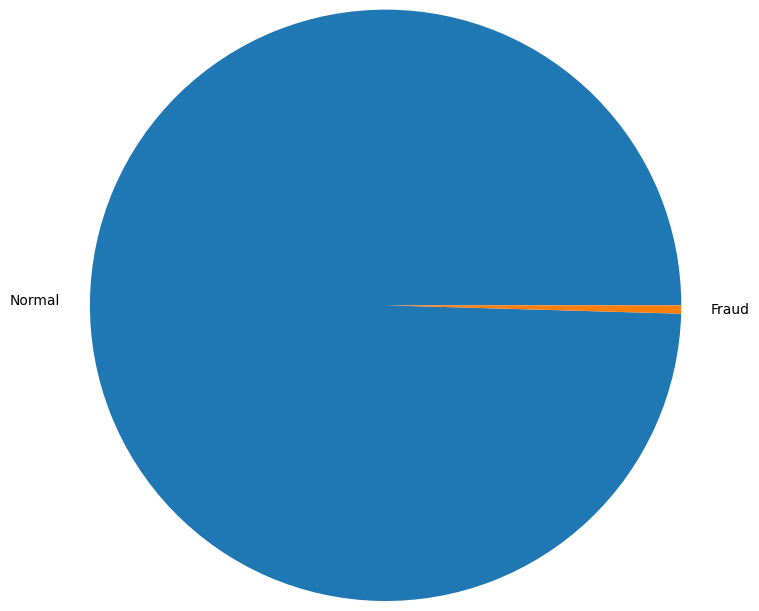

In [15]:
data['Class'].value_counts()

plt.pie(data['Class'].value_counts() ,labels=['Normal','Fraud'],radius=2)

In [16]:
from sklearn.model_selection import train_test_split

# 1. **Logistic** **Regression**

In [17]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
!pip install imbalanced-learn


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [19]:
data = data.dropna(subset=['Class'])    #train test split
X = data.drop(columns=['Class'])
y = data['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [23]:
# Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [24]:
logistic_models = {"Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=0.1, random_state=42)}

In [25]:

print("\nClass distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after balancing:
Class
0.0    13376
1.0    13376
Name: count, dtype: int64


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model train

In [27]:
logistic = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, C=1.0)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [30]:
#  Predictions
y_train_pred = logistic.predict(X_train_scaled)
y_test_pred = logistic.predict(X_test_scaled)

In [31]:
#  Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [32]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.99


In [33]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4460
         1.0       0.23      1.00      0.38        20

    accuracy                           0.99      4480
   macro avg       0.62      0.99      0.68      4480
weighted avg       1.00      0.99      0.99      4480



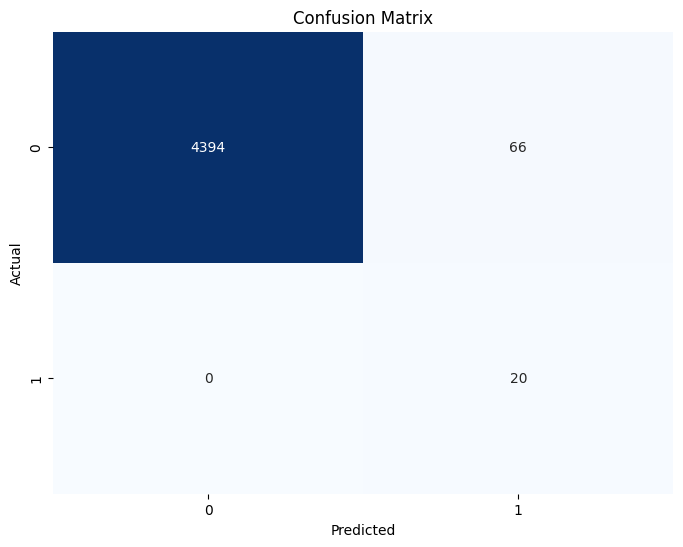

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Class Distribution:
Class
0.0    17836
1.0       81
Name: count, dtype: int64


<ipython-input-35-84aa2bd90d13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


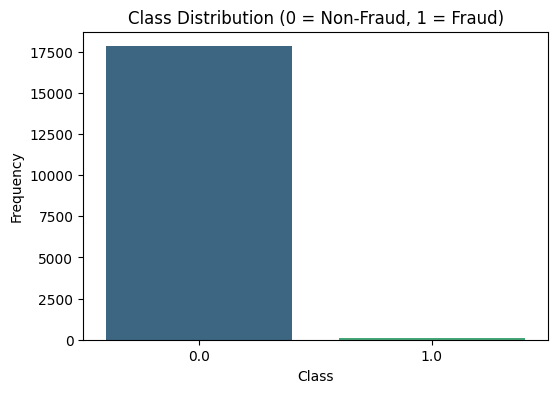

In [35]:

class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


#2. K-NEAREST NEIGHBORS (KNN)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#best n_neighbours optimization

param_grid = {'n_neighbors': range(3, 30, 2), 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(metric='minkowski', p=2), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
KNN_Model={"KNN (Regularized)": KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski', p=2)}

In [ ]:
# model training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

In [ ]:
# Predictions
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

In [ ]:
#  Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred_knn)
test_accuracy = accuracy_score(y_test, y_test_pred_knn)


In [ ]:

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_knn))

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. SUPPORT VECTOR MACHINE (SVM)

In [44]:

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [45]:

# regularization & model training
C_value = 0.1
svm_model = SVC(kernel='linear', C=C_value, random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [46]:
y_pred = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train)

In [ ]:

testing_accuracy = accuracy_score(y_test, y_pred)

training_accuracy = accuracy_score(y_train, y_train_pred)

print(f"SVM  Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"SVM   Testing Accuracy: {testing_accuracy * 100:.2f}%")


In [47]:

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM (with C={C_value}) Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM (with C=0.1) Accuracy: 99.82%
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4460
         1.0       0.80      0.80      0.80        20

    accuracy                           1.00      4480
   macro avg       0.90      0.90      0.90      4480
weighted avg       1.00      1.00      1.00      4480



In [48]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4456    4]
 [   4   16]]


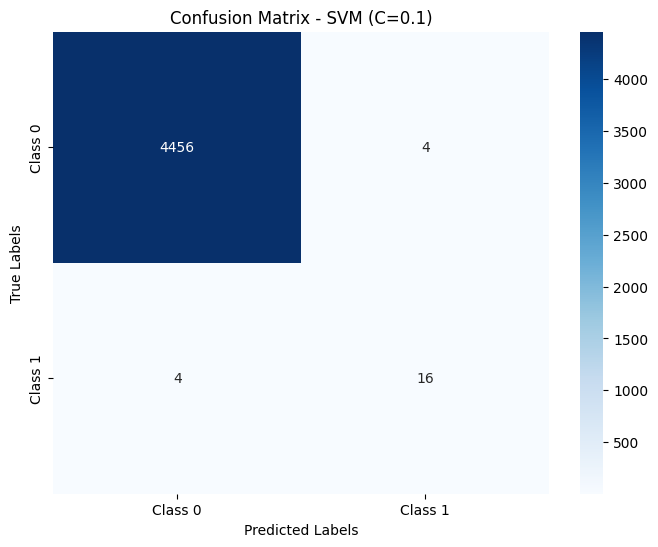

In [49]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix - SVM (C={C_value})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 4.PERCEPTRON

In [41]:
from sklearn.linear_model import Perceptron

In [42]:

# Regularization & model train
perceptron = Perceptron(penalty='l2', alpha=0.01, random_state=42, max_iter=1000)
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.01, penalty='l2', random_state=42)

Training Accuracy: 0.9553
Testing Accuracy: 0.9551

Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      4460
         1.0       0.09      1.00      0.17        20

    accuracy                           0.96      4480
   macro avg       0.55      0.98      0.57      4480
weighted avg       1.00      0.96      0.97      4480



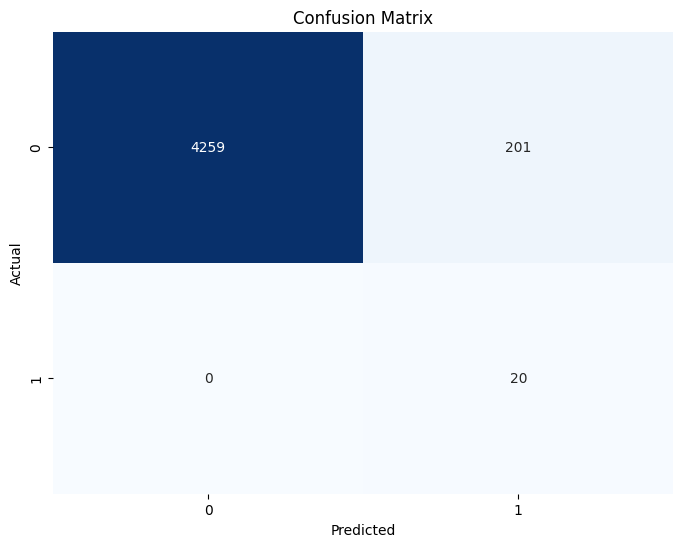


Class Distribution:
Class
0.0    17836
1.0       81
Name: count, dtype: int64


<ipython-input-43-2a4d074ebf73>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


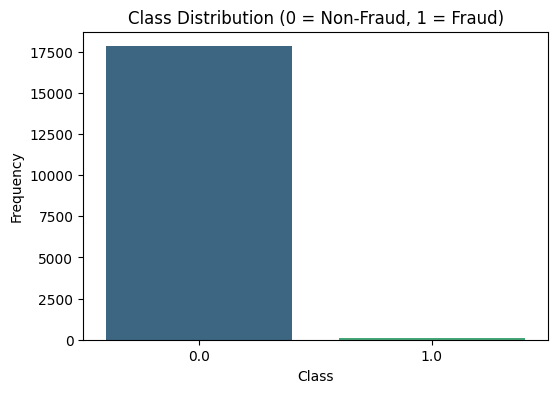

In [43]:



# Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Perceptron Model with Class Balancing
perceptron = Perceptron(
    max_iter=1000, random_state=42, class_weight="balanced", eta0=0.1, tol=1e-4
)
perceptron.fit(X_train_scaled, y_train)

# Step 7: Predictions
y_train_pred = perceptron.predict(X_train_scaled)
y_test_pred = perceptron.predict(X_test_scaled)

# Step 8: Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Class Distribution
class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Bar plot of class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
